<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/AirlineModelling3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import math

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
date_cols = ['CRSDepTime','DepTime','WheelsOff','WheelsOn','CRSArrTime','ArrTime']
df = pd.read_csv('/content/drive/MyDrive/Datasets/FlightDatasetModel1.0.csv',parse_dates=date_cols)

In [ ]:
df = df.replace(np.nan, 0)
df = df.drop(['Unnamed: 0'], axis=1)
print(df.shape)
df.head(3)

(635863, 70)


,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSDepTime,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage,TotalDelayBucket,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA.1","OrCity_Chicago, IL.1","OrCity_Dallas/Fort Worth, TX.1","OrCity_Houston, TX.1","OrCity_Los Angeles, CA.1",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
0,N266Aä,2672,15304,"Tampa, FL",Florida,10721,"Boston, MA",Massachusetts,2001-01-01 17:25:00,2001-01-01 17:51:00,26.0,9.0,2001-01-01 18:00:00,2001-01-01 20:34:00,9.0,2001-01-01 20:28:00,2001-01-01 20:43:00,15.0,183.0,172.0,0.223358,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0,0.175060,0.678571,0.000373,0,1,88237,6.800613,458230.0,6.848694,0.192561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,N5CãA1,1961,14908,"Santa Ana, CA",California,11298,"Dallas/Fort Worth, TX",Texas,2001-01-01 06:48:00,2001-01-01 06:49:00,1.0,23.0,2001-01-01 07:12:00,2001-01-01 11:41:00,28.0,2001-01-01 11:53:00,2001-01-01 12:09:00,16.0,185.0,200.0,0.216058,1205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148936,0,0.112557,1.000000,0.000187,0,1,154908,11.939088,653507.0,9.767299,0.237041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,N366@@,2124,14107,"Phoenix, AZ",Arizona,12889,"Las Vegas, NV",Nevada,2001-01-01 16:45:00,2001-01-01 16:45:00,0.0,9.0,2001-01-01 16:54:00,2001-01-01 16:36:00,4.0,2001-01-01 16:45:00,2001-01-01 16:40:00,-5.0,60.0,55.0,0.059854,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033435,0,0.448498,0.107143,0.002241,0,1,42531,3.277954,157642.0,2.356113,0.269795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['TailNumber', 'FlightNumberReportingAirline', 'OriginAirportID',
       'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName',
       'DestStateName', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'CRSElapsedTime', 'ActualElapsedTime', 'NAirTime', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'NTotalDelay', 'NGroundTime', 'DelayCheck',
       'NCityTrafficFreq', 'NStateAirportCount', 'NFlightUsage',
       'TotalDelayBucket', 'JourneyBtwCities', 'StateTraffic',
       'TrafficPercent', 'StateSumOfDelays', 'DelayPercent',
       'TrafficPerMinuteDelay', 'AptID_10397', 'AptID_11292', 'AptID_11298',
       'AptID_12892', 'AptID_13930', 'TNo_#NAME?', 'TNo_N476HA', 'TNo_N478HA',
       'TNo_N485HA', 'TNo_N486HA', 'FltNo_16', 'FltNo_3', 'FltNo_5',
       'FltNo_55', 'FltNo_64', 'OrCity_Atlanta, GA', 'OrCity_Chicago, IL',
 

In [ ]:
#converting object dtype to category dtype
df[['FlightNumberReportingAirline','AptID_10397', 'AptID_11292', 'AptID_11298',
       'AptID_12892', 'AptID_13930', 'TNo_#NAME?', 'TNo_N476HA', 'TNo_N478HA',
       'TNo_N485HA', 'TNo_N486HA', 'FltNo_16', 'FltNo_3', 'FltNo_5',
       'FltNo_55', 'FltNo_64', 'OrCity_Atlanta, GA', 'OrCity_Chicago, IL',
       'OrCity_Dallas/Fort Worth, TX', 'OrCity_Houston, TX',
       'OrCity_Los Angeles, CA', 'OrCity_Atlanta, GA.1',
       'OrCity_Chicago, IL.1', 'OrCity_Dallas/Fort Worth, TX.1',
       'OrCity_Houston, TX.1', 'OrCity_Los Angeles, CA.1',
       'OrState_California', 'OrState_Florida', 'OrState_Georgia',
       'OrState_Illinois', 'OrState_Texas']] = df[['FlightNumberReportingAirline','AptID_10397', 'AptID_11292', 'AptID_11298',
       'AptID_12892', 'AptID_13930', 'TNo_#NAME?', 'TNo_N476HA', 'TNo_N478HA',
       'TNo_N485HA', 'TNo_N486HA', 'FltNo_16', 'FltNo_3', 'FltNo_5',
       'FltNo_55', 'FltNo_64', 'OrCity_Atlanta, GA', 'OrCity_Chicago, IL',
       'OrCity_Dallas/Fort Worth, TX', 'OrCity_Houston, TX',
       'OrCity_Los Angeles, CA', 'OrCity_Atlanta, GA.1',
       'OrCity_Chicago, IL.1', 'OrCity_Dallas/Fort Worth, TX.1',
       'OrCity_Houston, TX.1', 'OrCity_Los Angeles, CA.1',
       'OrState_California', 'OrState_Florida', 'OrState_Georgia',
       'OrState_Illinois', 'OrState_Texas']].astype('category')

In [ ]:
#Dropping string columns
df = df.drop(['TailNumber','OriginCityName','OriginStateName','DestCityName','DestStateName'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635863 entries, 0 to 635862
Data columns (total 65 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   FlightNumberReportingAirline    635863 non-null  category      
 1   OriginAirportID                 635863 non-null  int64         
 2   DestAirportID                   635863 non-null  int64         
 3   CRSDepTime                      635863 non-null  datetime64[ns]
 4   DepTime                         635863 non-null  datetime64[ns]
 5   DepDelay                        635863 non-null  float64       
 6   TaxiOut                         635863 non-null  float64       
 7   WheelsOff                       635863 non-null  datetime64[ns]
 8   WheelsOn                        635863 non-null  datetime64[ns]
 9   TaxiIn                          635863 non-null  float64       
 10  CRSArrTime                      635863 non-null  datetim

In [ ]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#newdf = df.select_dtypes(include=numerics)
#newdf = newdf.astype(float)

In [ ]:
#removing features that do not shw significant change
qconstant_filter = VarianceThreshold(threshold=0.01)
x = qconstant_filter.fit(newdf)
len(newdf.columns[qconstant_filter.get_support()])

In [ ]:
#to check those constant columns
qconstant_columns = [column for column in newdf.columns
                    if column not in newdf.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))
for column in qconstant_columns:
    print(column)

In [ ]:
df['DelayCheck'].value_counts()

0    525920
1    109943
Name: DelayCheck, dtype: int64

In [ ]:
df0 = df[df['DelayCheck']==0].sample(n=109950)
df1 = df[df['DelayCheck']==1]
sample_df = pd.concat([df1,df0])
sample_df.shape

(219893, 65)

In [ ]:
corr_df = sample_df.drop(['NTotalDelay', 'TotalDelayBucket','DelayCheck'], axis=1)
corr_df = corr_df.drop(['CarrierDelay', 'NASDelay', 'SecurityDelay','LateAircraftDelay','DepDelay','ArrDelay'],axis=1)
correlated_features = set()
correlation_matrix = corr_df.corr()

In [ ]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
#correlated_features = correlated_features.remove('TotalDelayBucket')
#correlated_features = correlated_features.remove('NTotalDelay')
len(correlated_features)

8

In [ ]:
print(correlated_features)

{'ActualElapsedTime', 'NAirTime', 'NGroundTime', 'StateSumOfDelays', 'DelayPercent', 'StateTraffic', 'TrafficPercent', 'Distance'}


In [ ]:
#removing correlated features
corr_df = corr_df.drop(labels=correlated_features, axis=1)
print(corr_df.shape)
corr_df.head(5)

(219893, 48)


,FlightNumberReportingAirline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,CRSElapsedTime,WeatherDelay,NCityTrafficFreq,NStateAirportCount,NFlightUsage,JourneyBtwCities,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA.1","OrCity_Chicago, IL.1","OrCity_Dallas/Fort Worth, TX.1","OrCity_Houston, TX.1","OrCity_Los Angeles, CA.1",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
64814,870,11057,10792,2003-01-06 12:30:00,2003-01-06 12:28:00,30.0,2003-01-06 12:58:00,2003-01-06 14:23:00,5.0,2003-01-06 14:11:00,2003-01-06 14:28:00,101.0,0.0,0.292848,0.357143,0.001867,6,0.180628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64830,435,14100,10721,2003-01-06 20:00:00,2003-01-06 19:56:00,50.0,2003-01-06 20:46:00,2003-01-06 21:40:00,4.0,2003-01-06 21:24:00,2003-01-06 21:44:00,84.0,0.0,0.232751,0.250000,0.003922,87,0.174245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64831,1182,11109,11292,2003-01-06 14:00:00,2003-01-06 14:19:00,13.0,2003-01-06 14:32:00,2003-01-06 14:50:00,8.0,2003-01-06 14:39:00,2003-01-06 14:58:00,39.0,0.0,0.031672,0.357143,0.001681,21,0.178885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64847,1272,12892,10140,2003-01-06 12:10:00,2003-01-06 12:23:00,11.0,2003-01-06 12:34:00,2003-01-06 15:08:00,3.0,2003-01-06 14:55:00,2003-01-06 15:11:00,105.0,0.0,0.526907,1.000000,0.005789,34,0.237041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64860,1497,12889,13931,2003-01-06 15:05:00,2003-01-06 15:05:00,30.0,2003-01-06 15:35:00,2003-01-06 22:48:00,2.0,2003-01-06 22:30:00,2003-01-06 22:50:00,265.0,0.0,0.387070,0.071429,0.003361,5,0.227731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Feature Importance through random forest

In [ ]:
X = corr_df.copy()
Y = sample_df['TotalDelayBucket']
print(X.shape)
Y


(219893, 48)


64814     2
64830     2
64831     2
64847     2
64860     2
         ..
91988     0
346752    0
255209    0
597324    0
407343    0
Name: TotalDelayBucket, Length: 219893, dtype: int64

In [ ]:
X.head(5)

In [ ]:
print(X.isnull().sum())

In [ ]:
X = X.replace(np.nan, 0)
Y = Y.replace(np.nan, 0)
X.head(10)

In [ ]:
X_time = X[['CRSDepTime','DepTime','WheelsOff','WheelsOn','CRSArrTime','ArrTime']]
X = X.drop(['CRSDepTime','DepTime','WheelsOff','WheelsOn','CRSArrTime','ArrTime'],axis=1)
print(X)
X_time

       FlightNumberReportingAirline  ...  OrState_Texas
64814                           870  ...            0.0
64830                           435  ...            0.0
64831                          1182  ...            0.0
64847                          1272  ...            0.0
64860                          1497  ...            0.0
...                             ...  ...            ...
91988                           592  ...            0.0
346752                          634  ...            0.0
255209                          472  ...            0.0
597324                         5445  ...            0.0
407343                          757  ...            0.0

[219893 rows x 42 columns]


,CRSDepTime,DepTime,WheelsOff,WheelsOn,CRSArrTime,ArrTime
64814,2003-01-06 12:30:00,2003-01-06 12:28:00,2003-01-06 12:58:00,2003-01-06 14:23:00,2003-01-06 14:11:00,2003-01-06 14:28:00
64830,2003-01-06 20:00:00,2003-01-06 19:56:00,2003-01-06 20:46:00,2003-01-06 21:40:00,2003-01-06 21:24:00,2003-01-06 21:44:00
64831,2003-01-06 14:00:00,2003-01-06 14:19:00,2003-01-06 14:32:00,2003-01-06 14:50:00,2003-01-06 14:39:00,2003-01-06 14:58:00
64847,2003-01-06 12:10:00,2003-01-06 12:23:00,2003-01-06 12:34:00,2003-01-06 15:08:00,2003-01-06 14:55:00,2003-01-06 15:11:00
64860,2003-01-06 15:05:00,2003-01-06 15:05:00,2003-01-06 15:35:00,2003-01-06 22:48:00,2003-01-06 22:30:00,2003-01-06 22:50:00
...,...,...,...,...,...,...
91988,2004-11-04 12:19:00,2004-11-04 12:16:00,2004-11-04 12:34:00,2004-11-04 16:47:00,2004-11-04 16:46:00,2004-11-04 16:51:00
346752,2008-05-11 07:15:00,2008-05-11 07:13:00,2008-05-11 07:22:00,2008-05-11 10:27:00,2008-05-11 11:12:00,2008-05-11 10:37:00
255209,2007-07-07 10:05:00,2007-07-07 09:58:00,2007-07-07 10:09:00,2007-07-07 18:22:00,2007-07-07 18:43:00,2007-07-07 18:29:00
597324,2014-09-17 05:05:00,2014-09-17 05:03:00,2014-09-17 05:19:00,2014-09-17 05:52:00,2014-09-17 05:58:00,2014-09-17 05:55:00


In [ ]:
!pip install fast_ml
from fast_ml.feature_engineering import FeatureEngineering_DateTime
#Instantiate
dt_fe = FeatureEngineering_DateTime()#Fit
dt_fe.fit(df, datetime_variables=['DepTime'],
          prefix = 'DepTime')#Transform
dfdd = dt_fe.transform(df)
dfdd.head()


Feature: 0, Score: 0.13689
Feature: 1, Score: 0.03565
Feature: 2, Score: 0.08258
Feature: 3, Score: 0.16098
Feature: 4, Score: 0.08865
Feature: 5, Score: 0.11673
Feature: 6, Score: 0.02871
Feature: 7, Score: 0.03580
Feature: 8, Score: 0.02000
Feature: 9, Score: 0.12343
Feature: 10, Score: 0.14427
Feature: 11, Score: 0.02629
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

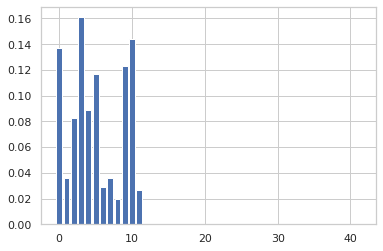

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, Y)
'''
rfe = RFE(model, 5)
rfe = rfe.fit(X, Y)
print(rfe.support_)
print(rfe.ranking_)
'''
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
idx = (-importance).argsort()[:15]
idx

array([ 3, 10,  0,  9,  5,  4,  2,  7,  1,  6, 11,  8, 40, 41, 15])

In [ ]:
c = X.columns
n=0
for i in c:
  print('Feature', n, i)
  n=n+1

Feature 0 FlightNumberReportingAirline
Feature 1 OriginAirportID
Feature 2 DestAirportID
Feature 3 TaxiOut
Feature 4 TaxiIn
Feature 5 CRSElapsedTime
Feature 6 WeatherDelay
Feature 7 NCityTrafficFreq
Feature 8 NStateAirportCount
Feature 9 NFlightUsage
Feature 10 JourneyBtwCities
Feature 11 TrafficPerMinuteDelay
Feature 12 AptID_10397
Feature 13 AptID_11292
Feature 14 AptID_11298
Feature 15 AptID_12892
Feature 16 AptID_13930
Feature 17 TNo_#NAME?
Feature 18 TNo_N476HA
Feature 19 TNo_N478HA
Feature 20 TNo_N485HA
Feature 21 TNo_N486HA
Feature 22 FltNo_16
Feature 23 FltNo_3
Feature 24 FltNo_5
Feature 25 FltNo_55
Feature 26 FltNo_64
Feature 27 OrCity_Atlanta, GA
Feature 28 OrCity_Chicago, IL
Feature 29 OrCity_Dallas/Fort Worth, TX
Feature 30 OrCity_Houston, TX
Feature 31 OrCity_Los Angeles, CA
Feature 32 OrCity_Atlanta, GA.1
Feature 33 OrCity_Chicago, IL.1
Feature 34 OrCity_Dallas/Fort Worth, TX.1
Feature 35 OrCity_Houston, TX.1
Feature 36 OrCity_Los Angeles, CA.1
Feature 37 OrState_Californ

###Modelling for checking delay

In [ ]:
from sklearn.model_selection import train_test_split
def lim_var_delaycheck(df, s1, s2, s3, s4, s5, s6,s7, v1):
  X = df[[s1, s2, s3, s4, s5, s6,s7]].values
  Y = df[[v1]]
  #train and test
#'NGroundTime' is depndent on certain local conditions. It cannot be predicted before the flight.
#X = X.values.reshape(-1,1)
#Y = Y.values.reshape(-1,1)
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
  #x_train, x_vld, y_train, y_vld = train_test_split(x,y,test_size = 0.25,random_state = 12)
  return x_train, x_test, y_train, y_test

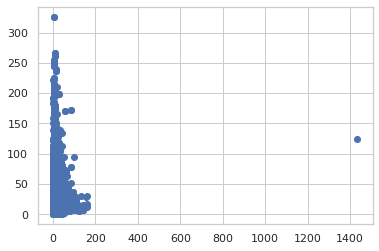

In [ ]:
plt.scatter(sample_df.TaxiIn,sample_df.TaxiOut)

In [ ]:
x_train, x_test, y_train, y_test = lim_var_delaycheck(sample_df,'JourneyBtwCities','NFlightUsage','WeatherDelay','CRSElapsedTime','Distance','FlightNumberReportingAirline','NGroundTime','TotalDelayBucket')
x_train.shape

(164919, 7)

In [ ]:
x_train, x_test, y_train, y_test = lim_var_delaycheck(sample_df,'JourneyBtwCities','NFlightUsage','TaxiOut','CRSElapsedTime','NCityTrafficFreq','FlightNumberReportingAirline','TaxiIn','TotalDelayBucket')
x_train.shape

(164919, 7)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Confusion matrix
 [[25968     0  1188   107    25     9     2     1     1     0     0     1
      0     2]
 [  241     0    28     0     0     1     0     0     0     0     0     0
      0     0]
 [ 9738     0  1202    84    21    10     0     0     1     0     0     0
      0     0]
 [ 4679     0   539   100    15     5     2     1     0     1     0     0
      0     0]
 [ 2706     0   341    51    18     9     2     0     0     0     0     0
      0     2]
 [ 1805     0   224    44    13    11     0     3     0     0     0     0
      0     1]
 [ 1256     0   162    33     7     8     1     2     0     0     0     0
      0     0]
 [  957     0   136    22     7     2     0     4     0     1     0     0
      0     2]
 [  662     0    95    17     7     1     2     0     0     0     0     0
      0     1]
 [  481     0    45    16     7     5     1     0     0     0     0     0
      0     0]
 [  344     0    41    12     4     3     0     0     0     0     0     0
      0     1]
 [

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print()
classifier.predict_proba(x_test)[0:5,:]

array([[0.35, 0.65],
       [0.85, 0.15],
       [0.7 , 0.3 ],
       [0.5 , 0.5 ],
       [0.4 , 0.6 ]])

No handles with labels found to put in legend.


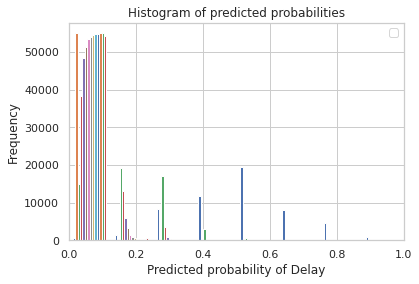

In [ ]:
y_pred_prob = classifier.predict_proba(x_test)
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Delay')
plt.ylabel('Frequency')
plt.legend()

In [ ]:
import sklearn.metrics as metrics
#ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0,1.0])
plt.ylim([0,1.0])
plt.title('ROC curve for Airline delay classifier')
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.grid(True)

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score




np.random.seed(0)

degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    #pipeline = Pipeline([("polynomial_features", polynomial_features),
                        # ("linear_regression", linear_regression)])
    #classifier.fit(X[:, np.newaxis], Y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(classifier, X, Y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(x_test, classifier.predict(x_test), label="Model")
    plt.plot(x_test, y_test, label="True function")
    plt.scatter(X, Y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
plt.plot(Y,train_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 12)
classifier.fit(x_train, y_train)

# Predicting a new result
#print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(x_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix\n",cm)
print("\nAccuracy score\n", accuracy_score(y_test, y_pred))
print("\nReport\n",classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Confusion matrix
 [[24223     5  2337   434   137    77    27    17    11    12     6     4
      4    10]
 [  190     8    61    10     1     0     0     0     0     0     0     0
      0     0]
 [ 6868     0  3634   355   105    35    14    17     7     5     5     4
      2     5]
 [ 3322     1   927   966    63    26    10     8     4     2     3     2
      3     5]
 [ 1944     0   518   154   454    23    14     6     6     3     2     2
      0     3]
 [ 1324     0   350    98    42   251    19     3     2     3     3     0
      0     6]
 [  959     0   231    39    36    23   159     9     6     1     1     1
      0     4]
 [  715     0   152    64    20    18     8   138     2     4     1     2
      1     6]
 [  500     0   118    41    16    15     6    13    74     0     0     0
      0     2]
 [  351     0    84    35    15     7     2     3     3    51     1     0
      1     2]
 [  248     0    60    27     9     5     3     3     1     5    41     1
      0     2]
 [

In [ ]:
y_pred_prob = classifier.predict_proba(x_test)

No handles with labels found to put in legend.


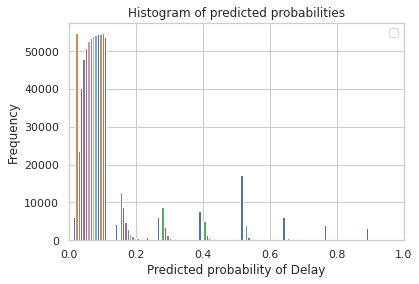

In [ ]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Delay')
plt.ylabel('Frequency')
plt.legend()

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=(7)),
     layers.Dense(256,activation='relu', use_bias=True),
     #layers.Dense(256, activation='softmax'),
     layers.Dense(14),
    ]
)

print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings

model.add(LeakyReLU(alpha=0.1))
keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'kullback_leibler_divergence', optimizer = 'Adam', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=20, verbose=2)
#history2 = model.fit(x_test, y_test, batch_size=32,epochs=20, verbose=2)

model.evaluate(x_test, y_test, batch_size=32,verbose=2)
#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               2048      
_________________________________________________________________
dense_43 (Dense)             (None, 14)                3598      
Total params: 5,646
Trainable params: 5,646
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
1933/1933 - 3s - loss: 25.1879 - accuracy: 0.0195 - val_loss: 24.4574 - val_accuracy: 0.0194
Epoch 2/20
1933/1933 - 3s - loss: 24.4072 - accuracy: 0.0185 - val_loss: 24.4574 - val_accuracy: 0.0194
Epoch 3/20
1933/1933 - 3s - loss: 24.4072 - accuracy: 0.0185 - val_loss: 24.4574 - val_accuracy: 0.0194
Epoch 4/20
1933/1933 - 3s - loss: 24.4073 - accuracy: 0.0185 - val_loss: 24.4574 - val_accuracy: 0.0194
Epoch 5/20
1933/1933 - 3s - loss: 24.4072 - accuracy: 0.0185 - val_loss: 24.4574 - val_accur

[24.338123321533203, 0.020173173397779465]

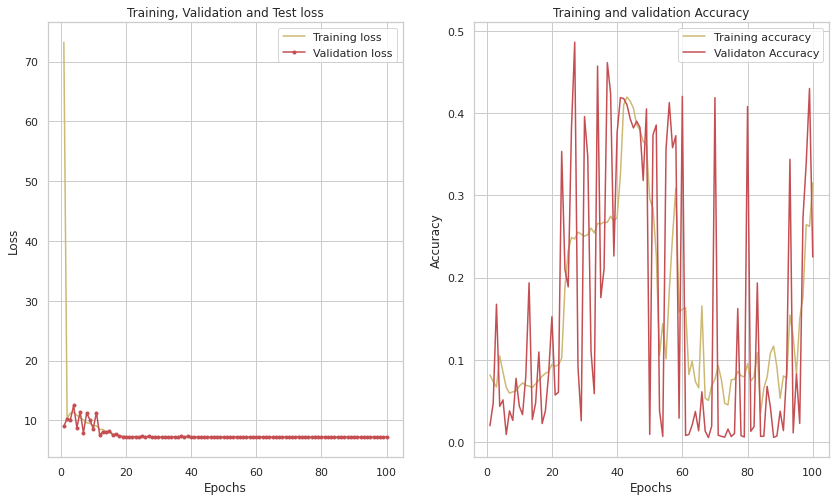

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((14,8)))

plt.subplot(1,2,1)
loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training, Validation and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Modelling for predicting delay

Feature importance for regressor

In [ ]:
newdf.shape

(648743, 55)

In [ ]:
correlated_features.remove('NTotalDelay')
print(correlated_features)


KeyError: ignored

In [ ]:
dfs = newdf.drop(labels=correlated_features, axis=1)
print(dfs.shape)
dfs.head(5)

(648743, 41)


,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Year,Quarter,DayofMonth,DayOfWeek,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,OriginWac,DestAirportID,DestCityMarketID,DestWac,CRSDepTime,DepDelay,TaxiOut,WheelsOn,TaxiIn,Cancelled,CancellationCode,Diverted,CRSElapsedTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2003.0,4.0,21.0,5.0,674.0,13930.0,30977.0,41.0,12953.0,31703.0,22.0,900.0,-5.0,14.0,1148.0,2.0,0.0,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.214286,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002.0,2.0,2.0,4.0,2408.0,12339.0,32337.0,42.0,13204.0,31454.0,33.0,1300.0,-1.0,14.0,1611.0,8.0,0.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088476,0.107143,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2004.0,4.0,21.0,2.0,1111.0,10423.0,30423.0,74.0,11540.0,30615.0,74.0,1150.0,0.0,10.0,1220.0,5.0,0.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108983,0.857143,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2003.0,2.0,6.0,5.0,7659.0,13029.0,33029.0,65.0,13930.0,30977.0,41.0,1330.0,0.0,3.0,1444.0,35.0,0.0,0.0,0.0,85.0,0.0,0.0,24.0,0.0,0.0,24.0,1.0,0.006540,0.071429,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2001.0,4.0,11.0,4.0,378.0,14107.0,30466.0,81.0,13796.0,32457.0,91.0,650.0,0.0,15.0,847.0,3.0,0.0,0.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448498,0.107143,0.0


In [ ]:
newdf.head(5)

,Unnamed: 0,FlightNumberReportingAirline,OriginAirportID,DestAirportID,DepDelay,TaxiOut,TaxiIn,ArrDelay,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage,TotalDelayBucket,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA.1","OrCity_Chicago, IL.1","OrCity_Dallas/Fort Worth, TX.1","OrCity_Houston, TX.1","OrCity_Los Angeles, CA.1",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
0,0.0,2672.0,15304.0,10721.0,26.0,9.0,9.0,15.0,183.0,172.0,0.223358,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0.0,0.175060,0.678571,0.000373,0.0,1.0,88237.0,6.800613,458230.0,6.848694,0.192561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1961.0,14908.0,11298.0,1.0,23.0,28.0,16.0,185.0,200.0,0.216058,1205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148936,0.0,0.112557,1.000000,0.000187,0.0,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2124.0,14107.0,12889.0,0.0,9.0,4.0,-5.0,60.0,55.0,0.059854,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033435,0.0,0.448498,0.107143,0.002241,0.0,1.0,42531.0,3.277954,157642.0,2.356113,0.269795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,4261.0,13930.0,14122.0,-6.0,32.0,4.0,-1.0,94.0,99.0,0.090511,412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103343,0.0,1.000000,0.214286,0.347899,0.0,1.0,85831.0,6.615177,595893.0,8.906201,0.144038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,838.0,14771.0,11618.0,5.0,40.0,12.0,36.0,316.0,347.0,0.429197,2565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151976,0.0,0.334493,1.000000,0.000373,0.0,1.0,154908.0,11.939088,653507.0,9.767299,0.237041,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#preparing data
X = newdf.loc[:, newdf.columns !='DelayCheck']
X = X.loc[:, X.columns !='TotalDelayBucket']
X = X.loc[:, X.columns !='NTotalDelay']

Y = newdf['TotalDelayBucket']
X.shape

(635863, 57)

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)


In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
c = newdf.columns
n=0
for i in c:
  print('Feature', n, i)
  n=n+1

In [ ]:
idx = (-importance).argsort()[:6]
idx

In [ ]:
x_train, x_test, y_train, y_test = lim_var_delaycheck(sample_df,'JourneyBtwCities','NFlightUsage','TaxiOut','CRSElapsedTime','NCityTrafficFreq','FlightNumberReportingAirline','TaxiIn','NTotalDelay')
x_train.shape

(164919, 7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


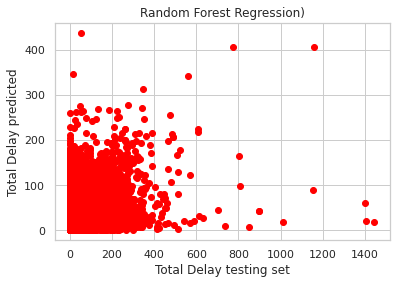

In [ ]:

# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 12)
regressor.fit(x_train, y_train)

# Predicting a new result
#y_predict = regressor.predict([[x_test]])
y_pred = regressor.predict(x_test)
# Visualising the Random Forest Regression results (higher resolution)
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(y_test, regressor.predict(x_test) , color = 'red')
#plt.plot(y_test, regressor.predict(x_test), color = 'blue')
plt.title('Random Forest Regression)')
plt.xlabel('Total Delay testing set')
plt.ylabel('Total Delay predicted')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.06460515083974472


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 45.89728752850104


(54974, 1)


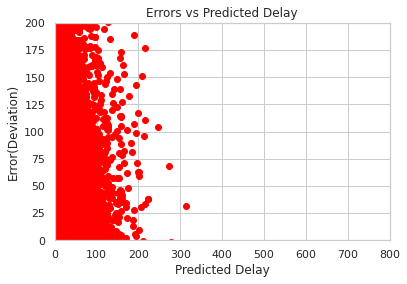

In [ ]:
# calculate errors
errors = []
y_pred = regressor.predict(x_test)
#changing shape of y_pred according to y_test
y_pred1 = y_pred[np.newaxis]
y_pred2 = y_pred1.T
print(y_pred2.shape)
#calculating errors
err =[]
err = np.subtract(y_test,y_pred2)
errors=[]
errors = np.square(err)
#plotting errors vs predicted values
plt.scatter(y_pred2, err, color = 'red')
#plt.plot(y_test, regressor.predict(x_test), color = 'blue')
plt.title('Errors vs Predicted Delay')
plt.xlabel('Predicted Delay')
plt.ylabel('Error(Deviation)')
plt.xlim([0,800])
plt.ylim([0,200])
plt.show()

In [ ]:
import scipy as sp
from scipy.interpolate import interp1d
# 300 represents number of points to make between T.min and T.max
xnew = np.linspace(y_pred2.min(), y_pred2.max(), 3000)

power_smooth = sp.interpolate.interp1d(y_pred2, err)(xnew)

plt.plot(xnew,power_smooth)
plt.show()

In [ ]:
print(y_pred2.shape)
print(err.shape)

(162186, 1)
(162186, 1)


In [ ]:
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))])
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

KeyboardInterrupt: ignored

###Neural networks

In [ ]:
model = keras.Sequential(
    [
     keras.Input(shape=(6)),
     layers.Dense(256,activation='relu', use_bias=True),
     #layers.Dense(512, activation='sigmoid'),
     layers.Dense(1),
    ]
)

print(model.summary()) #gives info about the network

#from_logits - it uses softmax function and then uses crossentropy
#If there is no 'sparse' in cross entropy, then it is for one-hot encodings

model.add(LeakyReLU(alpha=0.1))
keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

#Verbose - means prints after each epoch
#accuracy on training and test sets are displayed
history = model.fit(x_train, y_train, batch_size=64, validation_split= 0.25, epochs=20, verbose=2)
#history2 = model.fit(x_test, y_test, batch_size=32,epochs=20, verbose=2)

model.evaluate(x_test, y_test, batch_size=32,verbose=2)
#history = model.fit(X_train_scalled, y_train, validation_split=0.2, epochs=100)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5589/5589 - 9s - loss: 953.0062 - accuracy: 0.3392 - val_loss: 973.6823 - val_accuracy: 0.5143
Epoch 2/20
5589/5589 - 8s - loss: 917.5521 - accuracy: 0.2547 - val_loss: 1214.2808 - val_accuracy: 1.4259e-04
Epoch 3/20
5589/5589 - 8s - loss: 895.2671 - accuracy: 0.1745 - val_loss: 888.0713 - val_accuracy: 0.0924
Epoch 4/20
5589/5589 - 8s - loss: 879.1796 - accuracy: 0.1081 - val_loss: 911.5093 - val_accuracy: 0.2258
Epoch 5/20
5589/5589 - 7s - loss: 865.7874 - accuracy: 0.0386 - val_loss: 877.48

[875.248779296875, 0.002931444440037012]

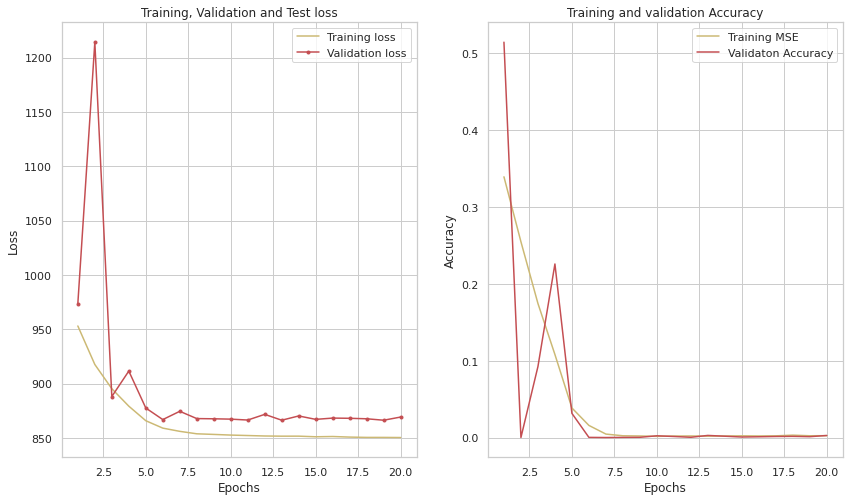

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((14,8)))

plt.subplot(1,2,1)
loss = history.history['loss']
val_loss = history.history['val_loss']
#test_loss = history2.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r.-', label='Validation loss')
#plt.plot(epochs, test_loss, 'g.-', label='Test loss')
plt.title('Training, Validation and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, 'y', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validaton Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for i in range(len(y_test)):
  #calculate error
  err = y_test[i] - y_pred[i]
  # store error
  err = err**2
  errors.append(err)
  # report error
  print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))])
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

In [ ]:
# compile the keras model
model.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)


In [ ]:
#correlation matrix
corr = newdf.corr()
corr = corr.replace(np.nan, 0)
corr = corr.replace(np.inf, 0)
#corr

In [ ]:
import numpy as np
def condition_number(corr):# corr: correlation matrix
    eigValues,eigVectors = np.linalg.eig(corr)
    return abs(max(eigValues)/min(eigValues))
 # greadily kick out the worst feature
def eliminate_multicol(X, threshold = 100):#weak corr threshold
    corr = np.corrcoef(X.T) # get corr matrix
    if (condition_number(corr) < threshold or X.shape[1]<=1):
        return X
    # find the feature with highest corr coef(lower triangle)
    mostCorrelated = np.argmax([max(corr[i+1:,i]) for i in range(X.shape[1]-1)] )
    choose = [True]*X.shape[1]
    choose[mostCorrelated] = False # kick that feature out
    return eliminate_multicol(X[:,choose])

In [ ]:
x = condition_number(corr)
d = eliminate_multicol(newdf)
d

In [ ]:
# max() is used to compare for Lowerbound
for i in range(len(y_test)):
  #calculate error
  err = y_test[i] - y_pred2[i]
  # store error
  err = err**2
  errors.append(err)
  # report error
  print('>%.1f, %.1f = %.3f' % (y_test[i], y_pred2[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))])
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()